# Third and Fourth Sets of Classifiers

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Splitting Data/Creating Dataframes

In [ ]:
import os
import librosa

# setting filepaths
filepaths = ['/Users/erikhartker/Downloads/sad', '/Users/erikhartker/Downloads/angry', '/Users/erikhartker/Downloads/fear', '/Users/erikhartker/Downloads/happy']

# setting sentiment labels
sentiments = ['Sad', 'Angry', 'Fearful', 'Happy']

i = 0

# creating dataframes for each folder/emotion
sad_df = pd.DataFrame(columns= ['Audio File', 'Sentiment'])
angry_df = pd.DataFrame(columns=['Audio File', 'Sentiment'])
fear_df = pd.DataFrame(columns=['Audio File', 'Sentiment'])
happy_df = pd.DataFrame(columns=['Audio File', 'Sentiment'])

# looping through each folder 
for folder_path in filepaths:
    print("Audio files in:", folder_path)

    # loop through all files in the folder
    for filename in os.listdir(folder_path):
        
        # check if the file is an audio file
        if filename.endswith('.wav'):

            file_path = os.path.join(folder_path, filename)
        
            # create a new row in the dataframe with the audio file's path and sentiment
            new_row = {'Audio File': file_path, 'Sentiment': sentiments[i]}
            
            # if statement to check what dataframe to add to
            if (sentiments[i] == 'Sad'):
                sad_df = sad_df.append(new_row, ignore_index = True)
            elif (sentiments[i] == 'Fearful'):
                fear_df = fear_df.append(new_row, ignore_index = True)
            elif (sentiments[i] == 'Angry'):
                angry_df = angry_df.append(new_row, ignore_index = True)
            elif (sentiments[i] == 'Happy'):
                happy_df = happy_df.append(new_row, ignore_index = True)
    # i incremented to indicate what sentiment the audio file is
    i = i+1
        
# separate 30 audio files for each category randomly using train_test_split from sklearn
train_data_sad, test_data_sad = train_test_split(sad_df, test_size=0.3)

train_data_angry, test_data_angry = train_test_split(angry_df, test_size=0.3)

train_data_happy, test_data_happy = train_test_split(happy_df, test_size=0.3)

train_data_fear, test_data_fear = train_test_split(fear_df, test_size=0.3)

# concatenate all training dataframes together, and all testing dataframes together
train_data = pd.concat([train_data_sad, train_data_angry, train_data_happy, train_data_fear], axis=0)
test_data = pd.concat([test_data_sad, test_data_angry, test_data_happy, test_data_fear], axis=0)

train_data_final = pd.DataFrame();
test_data_final = pd.DataFrame();




# print the audio data for sad_df
print(sad_df)

# Data Preparation (3rd Set of Features)

In [ ]:
train_data_final = pd.DataFrame();
test_data_final = pd.DataFrame();

In [ ]:
# similar process to previous data preparation, except feature averaging is conducted differently
for index, row in train_data.iterrows():
    
    # loading the audio file using librosa
    signal, sample_rate = librosa.load(row['Audio File'])

    # plotting each audio file in the time domain
    plt.figure(1)
    
    # the x-axis shows time in seconds, and the y-axis shows the amplitude of the signal
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.show()

    # plot audio files in frequency domain
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    # this code plots the audio file in the frequency domain using the Fast Fourier Transform (FFT) to convert the signal from the time domain to the frequency domain
    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()

    # plot the time-frequency variation of the audio
    D = librosa.stft(signal)  # this code computes and plots the Short-Time Fourier Transform (STFT) of the signal 
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    
    # this function provides a time-frequency representation of the audio signal, where the x-axis represents time and the y-axis represents frequency.
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

    # for each of the next five features, librosa functions are used to extract the feature, and the resultant values are placed into a dataframe corresponding to the feature.
    df_loudness = pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    print(rms[0])
    df_loudness['Loudness'] = rms[0]
    print(df_loudness.head(5))
    plt.figure(4)
    times = librosa.times_like(rms)
    plt.plot(times, rms[0])
    plt.xlabel("Time / second")
    plt.ylabel("Amplitude")
    plt.show()
    print(df_loudness.info())
    
    # audio feature extraction: mel-frequency cepstral coefficients
    # MFCCS are derived from the power spectrum of the audio signal, after the application of a filterbank that mimics the human auditory system's frequency resolution.
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    print(df_mfccs.head(5))
    plt.figure(5)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    print(df_mfccs.info())

    # audio feature extraction: zero crossing rate
    # zero crossing rate is the rate at which the signal changes sign
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    print(df_zero_crossing_rate.head(5))
    plt.figure(6)
    times = librosa.times_like(zcr)
    plt.plot(times, zcr[0])
    plt.xlabel("Time / second")
    plt.ylabel("Zero Crossing Rate")
    plt.show()
    print(df_zero_crossing_rate.info())

    # audio feature extraction: chroma
    # a chromagram is a 12-element feature vector that represents the distribution of energy over the 12 pitch classes of the octave
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    
     # a for loop is used here, as multiple chroma are provided in the chromagram, so each one needs to be added to the dataframe
    for n_chroma in range(len(chromagram)):
        # here each chroma is added. .T is used to flip the columns and rows, as we wish to represent chroma as columns, and the measurements for each chroma as entries on different rows
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    print(df_chroma.head(5))
    plt.figure(7)
    librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    print(df_chroma.info())

    # audio feature extraction: mel spectrogram
    # mel spectrograms also use the mel scale—which mimics the human auditory system's frequency resolution—and depict a visual representation of the power spectrum of the audio.
    df_mel_spectrogram = pd.DataFrame()
    
    # using more bands to achieve a more accurate "less blurry" mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=40)
    
    # same idea with the for loop as with the chromagram
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    print(df_mel_spectrogram.head(5))
    plt.figure(8)
    librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    print(df_mel_spectrogram.info())

    # combine all features
    feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    print(feature_matrix.head(5))

    # create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # normalize each column of the dataframe from -1 to 1
    feature_matrix_norm = pd.DataFrame(scaler.fit_transform(feature_matrix), columns=feature_matrix.columns)
    
    # get the mean of each column in the normalized dataframe
    means = feature_matrix_norm.mean()

    # create a new dataframe with the means
    means_df = pd.DataFrame(means).T
    print(means_df)

    # add the feature's sentiment for training
    means_df['Sentiment'] = row['Sentiment']

    # add the processed dataframe to the final train data
    train_data_final = pd.concat([train_data_final, means_df], axis=0)
    

In [ ]:
# same as above, except for the testing dataset
for index, row in test_data.iterrows():
    
    # loading the audio file using librosa
    signal, sample_rate = librosa.load(row['Audio File'])

    # plotting each audio file in the time domain
    plt.figure(1)
    
    # the x-axis shows time in seconds, and the y-axis shows the amplitude of the signal
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.show()

    # plot audio files in frequency domain
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    # this code plots the audio file in the frequency domain using the Fast Fourier Transform (FFT) to convert the signal from the time domain to the frequency domain
    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()

    # plot the time-frequency variation of the audio
    D = librosa.stft(signal)  # this code computes and plots the Short-Time Fourier Transform (STFT) of the signal 
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    
    # this function provides a time-frequency representation of the audio signal, where the x-axis represents time and the y-axis represents frequency.
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

    # for each of the next five features, librosa functions are used to extract the feature, and the resultant values are placed into a dataframe corresponding to the feature.
    df_loudness = pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    print(rms[0])
    df_loudness['Loudness'] = rms[0]
    print(df_loudness.head(5))
    plt.figure(4)
    times = librosa.times_like(rms)
    plt.plot(times, rms[0])
    plt.xlabel("Time / second")
    plt.ylabel("Amplitude")
    plt.show()
    print(df_loudness.info())
    
    # audio feature extraction: mel-frequency cepstral coefficients
    # MFCCS are derived from the power spectrum of the audio signal, after the application of a filterbank that mimics the human auditory system's frequency resolution.
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    print(df_mfccs.head(5))
    plt.figure(5)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    print(df_mfccs.info())

    # audio feature extraction: zero crossing rate
    # zero crossing rate is the rate at which the signal changes sign
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    print(df_zero_crossing_rate.head(5))
    plt.figure(6)
    times = librosa.times_like(zcr)
    plt.plot(times, zcr[0])
    plt.xlabel("Time / second")
    plt.ylabel("Zero Crossing Rate")
    plt.show()
    print(df_zero_crossing_rate.info())

    # audio feature extraction: chroma
    # a chromagram is a 12-element feature vector that represents the distribution of energy over the 12 pitch classes of the octave
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    
     # a for loop is used here, as multiple chroma are provided in the chromagram, so each one needs to be added to the dataframe
    for n_chroma in range(len(chromagram)):
        # here each chroma is added. .T is used to flip the columns and rows, as we wish to represent chroma as columns, and the measurements for each chroma as entries on different rows
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    print(df_chroma.head(5))
    plt.figure(7)
    librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    print(df_chroma.info())

    # audio feature extraction: mel spectrogram
    # mel spectrograms also use the mel scale—which mimics the human auditory system's frequency resolution—and depict a visual representation of the power spectrum of the audio.
    df_mel_spectrogram = pd.DataFrame()
    
    # using more bands to achieve a more accurate "less blurry" mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=40)
    
    # same idea with the for loop as with the chromagram
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    print(df_mel_spectrogram.head(5))
    plt.figure(8)
    librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    print(df_mel_spectrogram.info())

    # combine all features
    feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
    print(feature_matrix.head(5))

    # create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # normalize each column of the dataframe from -1 to 1
    feature_matrix_norm = pd.DataFrame(scaler.fit_transform(feature_matrix), columns=feature_matrix.columns)
    
    # get the mean of each column in the normalized dataframe
    means = feature_matrix_norm.mean()

    # create a new dataframe with the means
    means_df = pd.DataFrame(means).T
    print(means_df)

    # add the feature's sentiment for training
    means_df['Sentiment'] = row['Sentiment']

    # add the processed dataframe to the final train data
    test_data_final = pd.concat([test_data_final, means_df], axis=0)
    

# Model Training/Testing (3rd Set of Features)

In [ ]:
# here the sentiment column from the training and testing sets is split apart so the model's performance can be trained/evaluated
X_train = train_data_final.drop('Sentiment', axis=1)
y_train = train_data_final['Sentiment']

X_test = test_data_final.drop('Sentiment', axis=1)
y_test = test_data_final['Sentiment']

In [ ]:
#relevant sklearn classification models are imported
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

#variables are created for each classification model
svc = SVC(probability=True, random_state=42)
nbc = GaussianNB()
rfc = RandomForestClassifier(random_state=42)

#models are trained using the training input and output
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

#models now predict output based on new input, this prediction is stored in a variable
#models also predict probability of output using the predict_proba() function

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

#printing the classification reports for each model using the testing data and the model's predicted results
print("Support Vector Machine: ")
print(classification_report(y_test, y_svc_predicted))
print("Naive Bayes: ")
print(classification_report(y_test, y_nbc_predicted))
print("Random Forest: ")
print(classification_report(y_test, y_rfc_predicted))

#creating lists including each model's name, prediction, and prediction probabilities
models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

#printing the confusion matrix for each model
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    #prints the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    
    #sets colors
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    
    #sets title
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

plt.show()

# Data Preparation (4th Set of Features)

In [ ]:
train_data_final2 = pd.DataFrame();
test_data_final2 = pd.DataFrame();

In [ ]:
# similar process as previous data preparation, except with two added features
for index, row in train_data.iterrows():
    
    # loading the audio file using librosa
    signal, sample_rate = librosa.load(row['Audio File'])
    
    # the following code was derived from lecture:

    # plotting each audio file in the time domain
    plt.figure(1)
    
    # the x-axis shows time in seconds, and the y-axis shows the amplitude of the signal
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.show()

    # plot audio files in frequency domain
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    # this code plots the audio file in the frequency domain using the Fast Fourier Transform (FFT) to convert the signal from the time domain to the frequency domain
    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()

    # plot the time-frequency variation of the audio
    # this code computes and plots the Short-Time Fourier Transform (STFT) of the signal 
    D = librosa.stft(signal)   
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    # this function provides a time-frequency representation of the audio signal, where the x-axis represents time and the y-axis represents frequency.
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

    # for each of the next five features, librosa functions are used to extract the feature, and the resultant values are placed into a dataframe corresponding to the feature.
    
    df_loudness = pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    print(rms[0])
    df_loudness['Loudness'] = rms[0]
    print(df_loudness.head(5))
    plt.figure(4)
    times = librosa.times_like(rms)
    plt.plot(times, rms[0])
    plt.xlabel("Time / second")
    plt.ylabel("Amplitude")
    plt.show()
    print(df_loudness.info())
    
    # audio feature extraction: mel-frequency cepstral coefficients
    # MFCCS are derived from the power spectrum of the audio signal, after the application of a filterbank that mimics the human auditory system's frequency resolution.
    
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    plt.figure(5)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()

    # audio feature extraction: zero crossing rate
    # zero crossing rate is the rate at which the signal changes sign
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    plt.figure(6)
    times = librosa.times_like(zcr)
    plt.plot(times, zcr[0])
    plt.xlabel("Time / second")
    plt.ylabel("Zero Crossing Rate")
    plt.show()

    # audio feature extraction: chroma
    # a chromagram is a 12-element feature vector that represents the distribution of energy over the 12 pitch classes of the octave
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    
    # a for loop is used here, as multiple chroma are provided in the chromagram, so each one needs to be added to the dataframe
    for n_chroma in range(len(chromagram)):
        
        # here each chroma is added. .T is used to flip the columns and rows, as we wish to represent chroma as columns, and the measurements for each chroma as entries on different rows
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    print(df_chroma.head(5))
    plt.figure(7)
    librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()

    # audio feature extraction: mel spectrogram
    # mel spectrograms also use the mel scale—which mimics the human auditory system's frequency resolution—and depict a visual representation of the power spectrum of the audio.
    df_mel_spectrogram = pd.DataFrame()

    # using more bands to achieve a more accurate "less blurry" mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=40)
    
    # same idea with the for loop as with the chromagram
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    plt.figure(8)
    librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    
    # audio feature extraction: spectral bandwidth
    # spectral bandwidth is a feature in audio signal processing that measures the bandwidth of a signal at a particular time frame
    df_spec_bandwidth = pd.DataFrame()
    spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate)
    df_spec_bandwidth['Spec BW'] = spec_bw[0]
    print(df_spec_bandwidth.head(5))
    plt.figure(9)
    times = librosa.times_like(spec_bw)
    plt.plot(times, spec_bw[0])
    plt.xlabel("Time / second")
    plt.ylabel("Hz")
    plt.show()
    
    # audio feature extraction: spectral centroid
    # spectral centroid is a measure of where the "center of mass" of the spectrum of a sound is located
    df_spec_centroid = pd.DataFrame()
    cent = librosa.feature.spectral_centroid(y=signal, sr=sample_rate)
    df_spec_centroid['Spec Centroid'] = cent[0]
    print(df_spec_centroid.head(5))
    plt.figure(10)
    times = librosa.times_like(cent)
    plt.plot(times, cent[0])
    plt.xlabel("Time / second")
    plt.ylabel("Hz")
    plt.show()
    
    # combine all features
    feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram, df_spec_bandwidth, df_spec_centroid], axis=1)
    print(feature_matrix.head(5))

    # create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # normalize each column of the dataframe from -1 to 1
    feature_matrix_norm = pd.DataFrame(scaler.fit_transform(feature_matrix), columns=feature_matrix.columns)
    
    # get the mean of each column
    means = feature_matrix_norm.mean()

    # create a new dataframe with the means
    means_df = pd.DataFrame(means).T
    print(means_df)

    # add the feature's sentiment for training
    means_df['Sentiment'] = row['Sentiment']

    # add the processed dataframe to the final train data
    train_data_final2 = pd.concat([train_data_final2, means_df], axis=0)

In [ ]:
# same as above, but for test data
for index, row in test_data.iterrows():
    
    # loading the audio file using librosa
    signal, sample_rate = librosa.load(row['Audio File'])

    # plotting each audio file in the time domain
    plt.figure(1)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.show()

    # plot audio files in frequency domain
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()

    # plot the time-frequency variation of the audio
    D = librosa.stft(signal)  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.show()

    df_loudness = pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    print(rms[0])
    df_loudness['Loudness'] = rms[0]
    print(df_loudness.head(5))
    plt.figure(4)
    times = librosa.times_like(rms)
    plt.plot(times, rms[0])
    plt.xlabel("Time / second")
    plt.ylabel("Amplitude")
    plt.show()
    #
    # audio feature extraction: mel-frequency cepstral coefficients
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    print(df_mfccs.head(5))
    plt.figure(5)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()

    # audio feature extraction: zero crossing rate
    df_zero_crossing_rate = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]
    print(df_zero_crossing_rate.head(5))
    plt.figure(6)
    times = librosa.times_like(zcr)
    plt.plot(times, zcr[0])
    plt.xlabel("Time / second")
    plt.ylabel("Zero Crossing Rate")
    plt.show()

    # audio feature extraction: chroma
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    print(df_chroma.head(5))
    plt.figure(7)
    librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()

    # audio feature extraction: mel spectrogram
    df_mel_spectrogram = pd.DataFrame()

    # using more bands to achieve a more accurate "less blurry" mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=40)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    print(df_mel_spectrogram.head(5))
    plt.figure(8)
    librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()
    

    df_spec_bandwidth = pd.DataFrame()
    spec_bw = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate)
    df_spec_bandwidth['Spec BW'] = spec_bw[0]
    print(df_spec_bandwidth.head(5))
    plt.figure(9)
    times = librosa.times_like(spec_bw)
    plt.plot(times, spec_bw[0])
    plt.xlabel("Time / second")
    plt.ylabel("Hz")
    plt.show()
    print(df_spec_bandwidth.info())
    

    df_spec_centroid = pd.DataFrame()
    cent = librosa.feature.spectral_centroid(y=signal, sr=sample_rate)
    df_spec_centroid['Spec Centroid'] = cent[0]
    print(df_spec_centroid.head(5))
    plt.figure(10)
    times = librosa.times_like(cent)
    plt.plot(times, cent[0])
    plt.xlabel("Time / second")
    plt.ylabel("Hz")
    plt.show()


    # combine all features
    feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram, df_spec_bandwidth, df_spec_centroid], axis=1)
    print(feature_matrix.head(5))

    # create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # normalize each column of the dataframe
    feature_matrix_norm = pd.DataFrame(scaler.fit_transform(feature_matrix), columns=feature_matrix.columns)
    
    # get the mean of each column
    means = feature_matrix_norm.mean()

    # create a new dataframe with the means
    means_df = pd.DataFrame(means).T
    print(means_df)
    

    # pad the dataframe with NaN values to create a complete group of ten
    num_rows = (feature_matrix_norm.shape[0] // 5 + 1) * 5
    padded_df = feature_matrix_norm.reindex(range(num_rows)).fillna(np.nan)

    # reshape the padded dataframe into groups of ten rows
    reshaped_df = padded_df.values.reshape((-1, 5, padded_df.shape[1]))

    # compute the mean of each column for each group of ten rows
    averages = np.nanmean(reshaped_df, axis=1)

    # convert the resulting array back into a dataframe with the same columns
    x_avg = pd.DataFrame(averages, columns=feature_matrix_norm.columns)

    # drop any rows that contain only NaN values
    feature_matrix_avg = feature_matrix_avg.dropna()

    means_df['Sentiment'] = row['Sentiment']

    # print the resulting dataframe
    print(feature_matrix_avg)
    
    test_data_final2 = pd.concat([test_data_final2, means_df], axis=0)

# Model Training/Testing (4th Set of Features)

In [ ]:
X_train = train_data_final2.drop('Sentiment', axis=1)
y_train = train_data_final2['Sentiment']

X_test = test_data_final2.drop('Sentiment', axis=1)
y_test = test_data_final2['Sentiment']

train_data_final2.head(40)
train_data_final2.isna().sum()

Support Vector Machine: 
              precision    recall  f1-score   support

       Angry       0.77      0.90      0.83        30
     Fearful       0.91      0.70      0.79        30
       Happy       0.86      0.83      0.85        30
         Sad       0.91      1.00      0.95        30

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120

Naive Bayes: 
              precision    recall  f1-score   support

       Angry       0.84      0.90      0.87        30
     Fearful       0.90      0.93      0.92        30
       Happy       0.96      0.87      0.91        30
         Sad       0.97      0.97      0.97        30

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Random Forest: 
              precision    recall  f1-score   support

       Angry       0

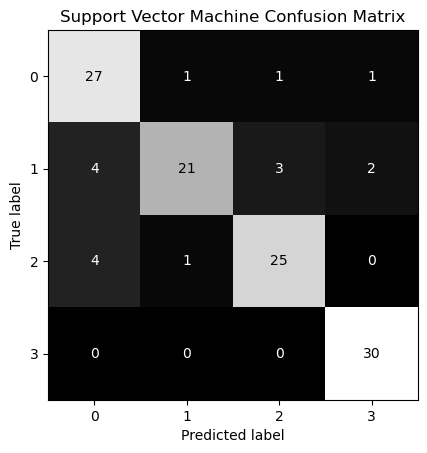

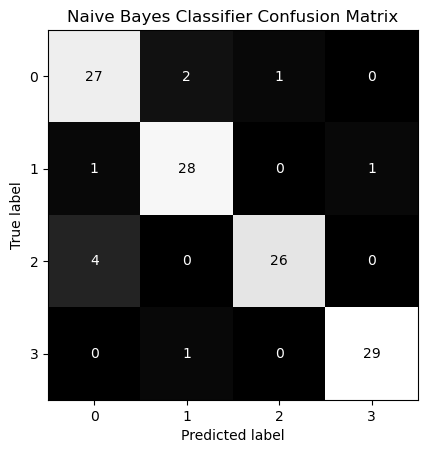

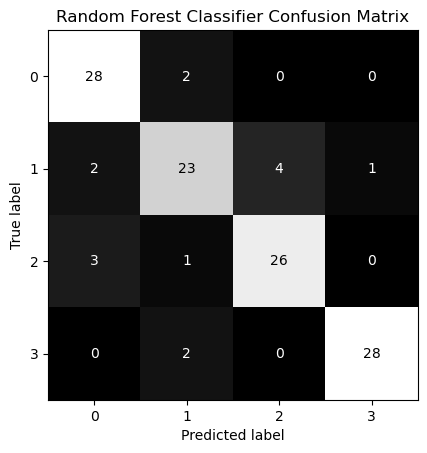

<Figure size 3000x1500 with 0 Axes>

In [ ]:
#variables are created for each classification model
svc = SVC(probability=True, random_state=42)
nbc = GaussianNB()
rfc = RandomForestClassifier(random_state=42)

#models are trained using the training input and output
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

#models now predict output based on new input, this prediction is stored in a variable
#models also predict probability of output using the predict_proba() function

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

#printing the classification reports for each model using the testing data and the model's predicted results
print("Support Vector Machine: ")
print(classification_report(y_test, y_svc_predicted))
print("Naive Bayes: ")
print(classification_report(y_test, y_nbc_predicted))
print("Random Forest: ")
print(classification_report(y_test, y_rfc_predicted))

#creating lists including each model's name, prediction, and prediction probabilities
models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

#printing the confusion matrix for each model
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    #prints the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    
    #sets colors
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    
    #sets title
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

plt.show()